# Capstone Webscrapping using BeautifulSoup

I scrap the historical exchange rates between the Singapore Dollar (SGD) and the US Dollar (USD) between 9/4/2020 and 3/3/2021



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/SGD/USD/T')

To visualize what exactly you get from the `request.get`, I use .content to see what I get, in here I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Singapore Dollar Exchange Rate - US Dollar - Historical Exchange Rates</title><!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\r\n<script type="text/javascript" async=true>\r\n(function() {\r\n  var host = window.location.hostname;\r\n  var element = document.createElement(\'script\');\r\n  var firstScript = document.getElementsByTagName(\'script\')[0];\r\n  var url = \'https://quantcast.mgr.consensu.org\'\r\n    .concat(\'/choice/\', \'8V5d7LJYEMQpZ\', \'/\', host, \'/choice.js\')\r\n  var uspTries = 0;\r\n  var uspTriesLimit = 3;\r\n  element.async = true;\r\n  element.type = '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. I use Beautiful soup class which will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Singapore Dollar Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
  <script async="true" type="text/javascript">
   (function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://quantcast.mgr.consensu.org'
    .concat('/choice/', '8V5d7LJYEMQpZ', '/', host, '/choice.js')
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcfapiLocator';
    var queue = [];
    var win = window;
    

In [6]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:1000])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/17/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-17-2021">
     1.34027
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-17-2021">
     USD SGD rate for 3/17/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/16/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-16-2021">
     1.34522
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-16-2021">
     USD SGD rate for 3/16/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/15/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-15-2021">
     1.34602
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-15-2021">
     USD SGD rate for 3/15/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
   


In [7]:
tr = table.find_all('tr')
tr
 # just call 2 founded tr

[<tr><td>3/17/2021</td><td>Wednesday</td><td><a href="/Rate/USD/SGD/3-17-2021">1.34027</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-17-2021">USD SGD rate for 3/17/2021</a></td></tr>,
 <tr><td>3/16/2021</td><td>Tuesday</td><td><a href="/Rate/USD/SGD/3-16-2021">1.34522</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-16-2021">USD SGD rate for 3/16/2021</a></td></tr>,
 <tr><td>3/15/2021</td><td>Monday</td><td><a href="/Rate/USD/SGD/3-15-2021">1.34602</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-15-2021">USD SGD rate for 3/15/2021</a></td></tr>,
 <tr><td>3/12/2021</td><td>Friday</td><td><a href="/Rate/USD/SGD/3-12-2021">1.34493</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-12-2021">USD SGD rate for 3/12/2021</a></td></tr>,
 <tr><td>3/11/2021</td><td>Thursday</td><td><a href="/Rate/USD/SGD/3-11-2021">1.33970</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/S

In [8]:
temp = []
for row in tr:
    tds = row.find_all('td')
    try:
        date = tds[0].text
        day = tds[1].text
        rate = tds[2].text
        desc = tds[3].text
        temp.append([date , day, rate, desc])
    except:
        pass

temp[:5]

[['3/17/2021', 'Wednesday', '1.34027 SGD', 'USD SGD rate for 3/17/2021'],
 ['3/16/2021', 'Tuesday', '1.34522 SGD', 'USD SGD rate for 3/16/2021'],
 ['3/15/2021', 'Monday', '1.34602 SGD', 'USD SGD rate for 3/15/2021'],
 ['3/12/2021', 'Friday', '1.34493 SGD', 'USD SGD rate for 3/12/2021'],
 ['3/11/2021', 'Thursday', '1.33970 SGD', 'USD SGD rate for 3/11/2021']]

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

In [9]:
temp = temp[::-1]
temp[:10]

[['9/18/2020', 'Friday', '1.35980 SGD', 'USD SGD rate for 9/18/2020'],
 ['9/20/2020', 'Sunday', '1.35865 SGD', 'USD SGD rate for 9/20/2020'],
 ['9/21/2020', 'Monday', '1.36213 SGD', 'USD SGD rate for 9/21/2020'],
 ['9/22/2020', 'Tuesday', '1.36500 SGD', 'USD SGD rate for 9/22/2020'],
 ['9/23/2020', 'Wednesday', '1.37297 SGD', 'USD SGD rate for 9/23/2020'],
 ['9/24/2020', 'Thursday', '1.37609 SGD', 'USD SGD rate for 9/24/2020'],
 ['9/25/2020', 'Friday', '1.37732 SGD', 'USD SGD rate for 9/25/2020'],
 ['9/27/2020', 'Sunday', '1.37721 SGD', 'USD SGD rate for 9/27/2020'],
 ['9/28/2020', 'Monday', '1.37287 SGD', 'USD SGD rate for 9/28/2020'],
 ['9/29/2020', 'Tuesday', '1.36879 SGD', 'USD SGD rate for 9/29/2020']]

## Creating data frame & Data wrangling

Put the array into dataframe

In [10]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','day','rate','desc')).set_index('date')
df.head()

,day,rate,desc
date,,,
9/18/2020,Friday,1.35980 SGD,USD SGD rate for 9/18/2020
9/20/2020,Sunday,1.35865 SGD,USD SGD rate for 9/20/2020
9/21/2020,Monday,1.36213 SGD,USD SGD rate for 9/21/2020
9/22/2020,Tuesday,1.36500 SGD,USD SGD rate for 9/22/2020
9/23/2020,Wednesday,1.37297 SGD,USD SGD rate for 9/23/2020


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

C:\Users\USER\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

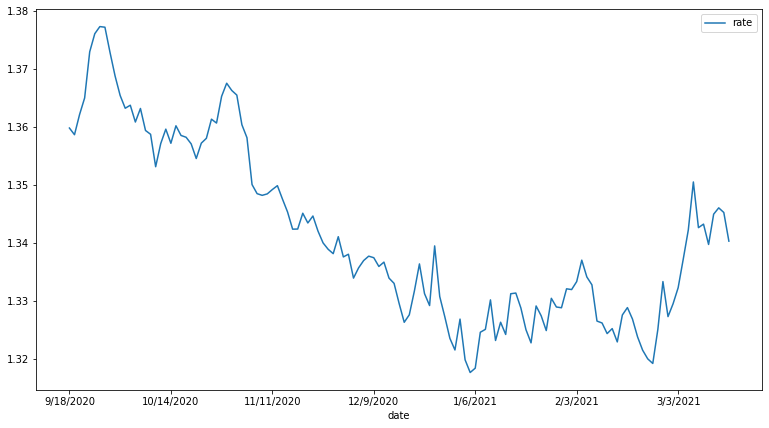

In [15]:
# df['rate'] = df['rate'].str.replace("SGD","")
# df['rate'] = df['rate'].astype('float64')
df.plot(figsize=(13,7))
# df['rate'].plot()

USD has remained relatively stable in the past few weeks after experiencing a sharp decline from 1.38 to 1.32. 
In conclusion, SGD is a stable currency and there is not much movement between the two currencies. However, speculators have to be wary of volality due to economic uncertainty.